THE SPARKS FOUNDATION

TASK 2- PREDICTION USING UNSUPERVISED ML (Visualize and predict the optimum number of clusters using the given dataset)

LEVEL- BEGINNER

Done By-: Megha khanna

In [2]:
#importing all the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [3]:
# importing the dataset
iris=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["sepal length","sepal width","petal length","petal width","class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail(10)

,sepal length,sepal width,petal length,petal width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.shape

(150, 5)

In [6]:
iris.nunique()['class']

3

In [7]:
iris.count()

sepal length    150
sepal width     150
petal length    150
petal width     150
class           150
dtype: int64

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#Checking for any null value
iris.isnull().any()

sepal length    False
sepal width     False
petal length    False
petal width     False
class           False
dtype: bool

In [11]:
# removing the column 'class'
iris['class'] = iris['class'].str.split("-",expand=True)[1]
iris.drop("class",axis=1,inplace=True)
iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**K-Means clustering is an unsupervised ML-Learning Technique used to group a set of objects such that objects of similar group
look more similar to each other than the objects from the other group**

In [15]:
from sklearn.cluster import KMeans
x = iris.iloc[:, [0, 1, 2, 3]].values



In [13]:
# finding optimal number of clusters 
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

C:\Users\Lagan Khanna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


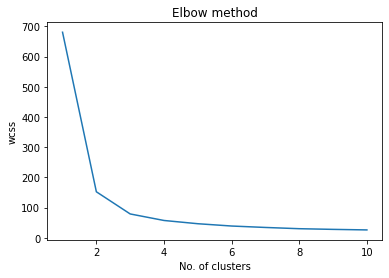

In [42]:
# Plotting the results on a line graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
# Within cluster sum of squares
plt.ylabel('wcss') 
plt.show()

The point after which the distortion start decreasing in a linear plot will return us the value of k. Thus for the given data, we conclude that the optimal number of clusters is 3.

In [45]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [46]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

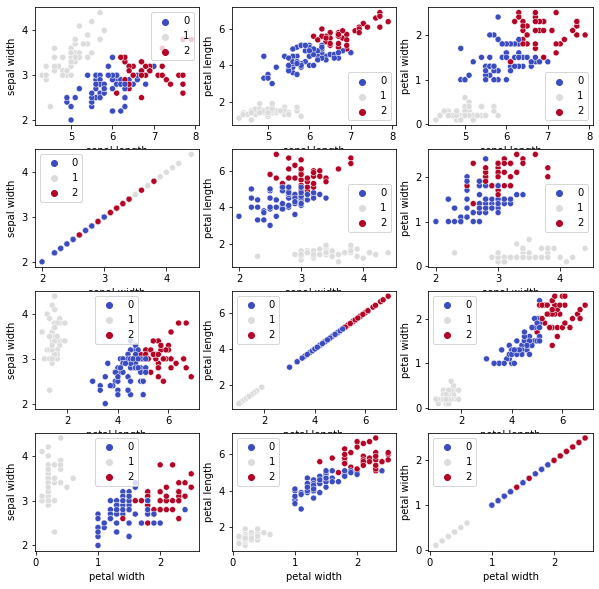

In [51]:
# Visualising the clusters using pair plot
fig,ax=plt.subplots(4,3,figsize=(10,10))
for index_i,i in enumerate(["sepal length","sepal width","petal length","petal width"]):
    for index_j,j in enumerate(["sepal width","petal length","petal width"]):
        sns.scatterplot(iris[i],iris[j], hue=kmeans.predict(x),palette="coolwarm",ax=ax[index_i,index_j])


Result:- There are total 3 optimum clusters which are represented in a visualization manner.

